In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_excel('dane.xlsx', header=[0,1], index_col=0)

In [3]:
#kraje wzięte do analiz
df.index.values

array(['Belgia', 'Bułgaria', 'Czechy', 'Dania', 'Niemcy', 'Estonia',
       'Irlandia', 'Grecja', 'Hiszpania', 'Francja', 'Chorwacja',
       'Włochy', 'Łotwa', 'Litwa', 'Luksemburg', 'Węgry', 'Malta',
       'Holandia', 'Austria', 'Polska', 'Portugalia', 'Rumunia',
       'Słowenia', 'Słowacja', 'Finlandia', 'Szwecja', 'Islandia',
       'Norwegia', 'Szwajcaria', 'Turcja'], dtype=object)

In [4]:
#zmienne wzięte do analiz
df.columns.get_level_values(0).unique()

Index(['Zarobki netto (singiel bez dzieci zarabiający 50% średnich zarobków)',
       'Wskaźnik zagrożenia ubóstwem (punkt odcięcia 50% mediana dochodu ekwiwalentnego)',
       ' Wysokość podatku (singiel bez dzieci zarabiający 50% średnich zarobków)',
       'Realny PKB na mieszkańca',
       'Zharmonizowany indeks cen konsumpcyjnych (HICP) – średni roczny wskaźnik',
       'Poziom bezrobocia wśród ludzi 20-64 lata', 'Długość życia',
       'Procentowa ilość osób z wykształceniem wyższym w wieku 20-64 lata'],
      dtype='object')

In [5]:
#lata wzięte do analiz
df.columns.get_level_values(1).unique()

Index(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], dtype='object', name='Rok')

In [6]:
pd.get_option("display.max_columns")
pd.get_option("display.max_rows")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [7]:
df

Zarobki netto (singiel bez dzieci zarabiający 50% średnich zarobków)  \
Rok                                                                        2011   
Belgia                                               16155.90                     
Bułgaria                                              1698.22                     
Czechy                                                5098.07                     
Dania                                                17778.94                     
Niemcy                                               14923.50                     
Estonia                                               4343.57                     
Irlandia                                             18638.95                     
Grecja                                                9530.22                     
Hiszpania                                            11379.49                     
Francja                                              14237.83                     
Chorwacja                                             4265.61                     
Włochy                                               11193.90                     
Łotwa                                                 2739.27                     
Litwa                                                 2864.87                     
Luksemburg                                           21107.97                     
Węgry                                                 3464.05                     
Malta                                                 8664.38                     
Holandia                                             18116.27                     
Austria                                              15644.71                     
Polska                                                3639.50                     
Portugalia                                            7212.56                     
Rumunia                                               2126.55                     
Słowenia                                              6676.89                     
Słowacja                                              4159.51                     
Finlandia                                            16405.17                     
Szwecja                                              16687.58                     
Islandia                                             14267.79                     
Norwegia                                             24493.05                     
Szwajcaria                                           30306.19                     
Turcja                                                3324.21                     

                                                                        \
Rok             2012      2013      2014      2015      2016      2017   
Belgia      16628.54  17057.94  17200.17  17433.61  18256.11  18658.25   
Bułgaria     1799.23   1899.03   2016.86   2169.57   2344.52   2566.37   
Czechy       5131.47   4958.95   4788.23   4959.67   5184.11   5620.21   
Dania       18017.05  18200.41  18453.01  18632.53  18812.99  19108.75   
Niemcy      15281.22  15528.82  15896.52  16254.16  16576.26  16849.06   
Estonia      4587.77   4904.29   5138.91   5504.01   6211.59   6332.72   
Irlandia    18913.88  18832.07  18944.27  19243.25  19768.23  20163.46   
Grecja       9265.39   8809.71   8955.03   8658.72   8434.73   8363.46   
Hiszpania   11446.04  11478.96  11519.75  11927.12  11919.80  11947.71   
Francja     14418.13  14841.75  14998.16  14798.86  15481.07  15662.91   
Chorwacja    4302.98   4346.31   4334.51   4518.91   4656.84   4981.71   
Włochy      11366.63  11531.76  12475.05  12859.23  12881.04  12905.38   
Łotwa        2827.38   2980.64   3240.17   3510.79   3765.26   4088.36   
Litwa        2982.08   3141.66   3358.58   3543.18   3895.72   4398.84   
Luksemburg  21777.19  22244.21  22682.48  22867.92  23071.22  24487.18   
Węgry        3215.68   3237.54   3239.21   3351.78   3569.36   4011.86   
Malta        8944.13  

# statystki opisowe
średnia, odchylenie, współczynnik zmienności, mediana, kurtoza, skośność, min, max, rozstęp, kwartyl górny, dolny

In [8]:
def licz_statystyki(df, rok):
    statystyki = pd.DataFrame()
    df_rok = df.xs(rok, axis=1, level=1, drop_level=False)
    statystyki['M'] = df_rok.mean()
    statystyki['SD'] = df_rok.std()
    statystyki['V'] = statystyki['SD']/statystyki['M']*100
    statystyki['Min'] = df_rok.min()
    statystyki['Q1'] = df_rok.describe()[df_rok.describe().index == '25%'].transpose()
    statystyki['Mde'] = df_rok.median()
    statystyki['Q3'] = df_rok.describe()[df_rok.describe().index == '75%'].transpose()
    statystyki['Max'] = df_rok.max()
    statystyki['K'] = df_rok.kurt()
    statystyki['SKE'] = df_rok.skew()
    return statystyki

In [9]:
df_2011 = licz_statystyki(df,'2011')
df_2011.index = df_2011.index.get_level_values(0)
df_2011
# df_2011.to_excel('statystyki_opisowe_X3.xlsx')

,M,SD,V,Min,Q1,Mde,Q3,Max,K,SKE
Zarobki netto (singiel bez dzieci zarabiający 50% średnich zarobków),11038.157333,7519.691714,68.124520,1698.22,4186.0350,10362.060,16342.8525,30306.19,-0.241040,0.622306
Wskaźnik zagrożenia ubóstwem (punkt odcięcia 50% mediana dochodu ekwiwalentnego),16.116667,3.915582,24.295234,9.20,13.6250,15.350,19.1500,23.50,-0.819422,0.164513
Wysokość podatku (singiel bez dzieci zarabiający 50% średnich zarobków),20.174667,5.719818,28.351486,10.65,16.3525,20.745,22.5575,31.45,-0.451313,0.092308
Realny PKB na mieszkańca,26680.000000,18834.581547,70.594384,5320.00,10945.0000,20450.000,36177.5000,82490.00,1.501455,1.233439
Zharmonizowany indeks cen konsumpcyjnych (HICP) – średni roczny wskaźnik,94.850667,4.903208,5.169397,72.79,94.0250,95.240,96.5850,102.36,14.550817,-3.134659
Poziom bezrobocia wśród ludzi 20-64 lata,7.133333,3.446771,48.319219,2.40,4.9250,5.800,9.6250,16.40,0.309686,0.974559
Długość życia,79.253333,2.944982,3.715909,73.70,76.8750,80.650,81.2500,82.80,-0.959314,-0.691950
Procentowa ilość osób z wykształceniem wyższym w wieku 20-64 lata,23.316667,6.980667,29.938529,11.30,16.3250,23.950,29.0500,34.40,-1.390065,-0.163176


# eliminacja obserwacji odstających

In [10]:
df_2011.index

Index(['Zarobki netto (singiel bez dzieci zarabiający 50% średnich zarobków)',
       'Wskaźnik zagrożenia ubóstwem (punkt odcięcia 50% mediana dochodu ekwiwalentnego)',
       ' Wysokość podatku (singiel bez dzieci zarabiający 50% średnich zarobków)',
       'Realny PKB na mieszkańca',
       'Zharmonizowany indeks cen konsumpcyjnych (HICP) – średni roczny wskaźnik',
       'Poziom bezrobocia wśród ludzi 20-64 lata', 'Długość życia',
       'Procentowa ilość osób z wykształceniem wyższym w wieku 20-64 lata'],
      dtype='object')

In [11]:
def eliminuj_outliery(import_df, zmienna):
    plt.boxplot(import_df.xs(f'{zmienna}',axis=1, level=0, drop_level=False))
    plt.show()
    final_df = pd.DataFrame()
    for rok in import_df.columns.get_level_values(1).unique():
        df_stats = licz_statystyki(import_df,f'{rok}')
        df_stats.index = df_stats.index.get_level_values(0)
        df = import_df.xs(f'{zmienna}',axis=1, level=0, drop_level=False).droplevel(level=0,axis=1)[f'{rok}'].values
        q1 = df_stats[df_stats.index == f'{zmienna}']['Q1'].values[0]
        q3 = df_stats[df_stats.index == f'{zmienna}']['Q3'].values[0]
        med = df_stats[df_stats.index == f'{zmienna}']['Mde'].values[0]
        # rozstęp ćwiartkowy
        rozstep = q3-q1
        # wąs górny i dolny
        was_gorny = q3+(1.5*rozstep)
        was_dolny = q1-(1.5*rozstep)
        outliers = df[(df <= was_dolny) | (df >= was_gorny)]
        if len(outliers) == 0:
            print(f'Nie ma obserwacji odstających dla roku {rok}')
            final_df[f'{rok}'] = df.tolist()
        else:
            df[df > was_gorny] = was_gorny
            df[df < was_dolny] = was_dolny
            print(f'Obserwacje odstające : {outliers}')
            final_df[f'{rok}'] = df.tolist()
    plt.boxplot(final_df)
    plt.show()
    final_df.index = import_df.index.values
    return final_df


X1 - Zarobki netto (singiel bez dzieci zarabiający 50% średnich zarobków)

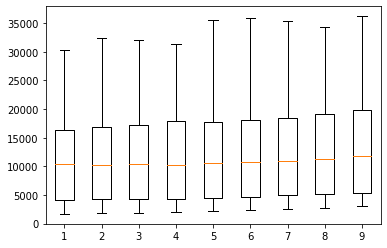

Nie ma obserwacji odstających dla roku 2011
Nie ma obserwacji odstających dla roku 2012
Nie ma obserwacji odstających dla roku 2013
Nie ma obserwacji odstających dla roku 2014
Nie ma obserwacji odstających dla roku 2015
Nie ma obserwacji odstających dla roku 2016
Nie ma obserwacji odstających dla roku 2017
Nie ma obserwacji odstających dla roku 2018
Nie ma obserwacji odstających dla roku 2019


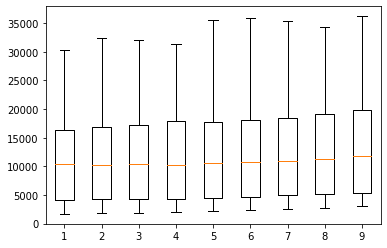

In [12]:
X1 = eliminuj_outliery(df,'Zarobki netto (singiel bez dzieci zarabiający 50% średnich zarobków)')

X2 - Wskaźnik zagrożenia ubóstwem (punkt odcięcia 50% mediana dochodu ekwiwalentnego)

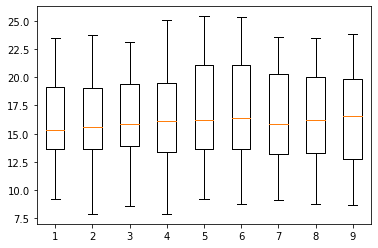

Nie ma obserwacji odstających dla roku 2011
Nie ma obserwacji odstających dla roku 2012
Nie ma obserwacji odstających dla roku 2013
Nie ma obserwacji odstających dla roku 2014
Nie ma obserwacji odstających dla roku 2015
Nie ma obserwacji odstających dla roku 2016
Nie ma obserwacji odstających dla roku 2017
Nie ma obserwacji odstających dla roku 2018
Nie ma obserwacji odstających dla roku 2019


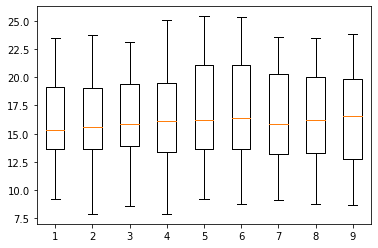

In [13]:
X2 = eliminuj_outliery(df,'Wskaźnik zagrożenia ubóstwem (punkt odcięcia 50% mediana dochodu ekwiwalentnego)')

X3 - Wysokość podatku (singiel bez dzieci zarabiający 50% średnich zarobków)

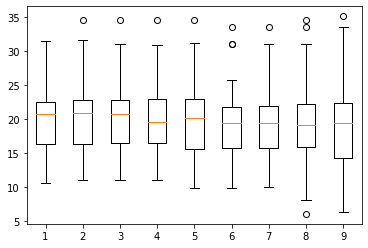

Nie ma obserwacji odstających dla roku 2011
Obserwacje odstające : [34.5]
Obserwacje odstające : [34.5]
Obserwacje odstające : [34.5]
Obserwacje odstające : [34.5]
Obserwacje odstające : [31.1  31.08 33.5 ]
Obserwacje odstające : [33.5]
Obserwacje odstające : [ 6.03 33.5  34.57]
Obserwacje odstające : [35.12]


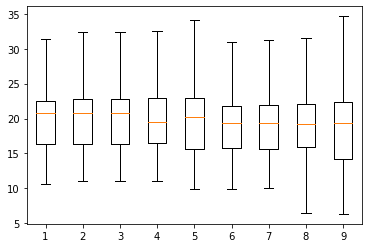

In [14]:
X3 = eliminuj_outliery(df,' Wysokość podatku (singiel bez dzieci zarabiający 50% średnich zarobków)')

X4 - Realny PKB na mieszkańca

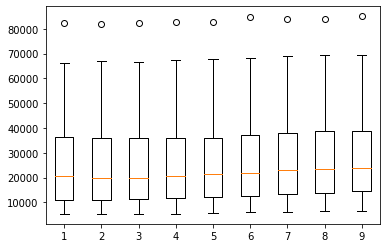

Obserwacje odstające : [82490]
Obserwacje odstające : [81940]
Obserwacje odstające : [82400]
Obserwacje odstające : [82590]
Obserwacje odstające : [82820]
Obserwacje odstające : [84750]
Obserwacje odstające : [84020]
Obserwacje odstające : [84040]
Obserwacje odstające : [85030]


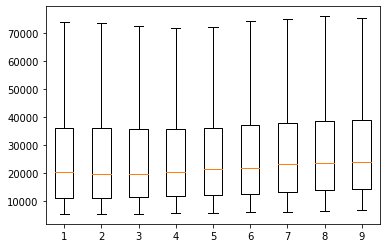

In [15]:
X4 = eliminuj_outliery(df,'Realny PKB na mieszkańca')

X5 - Zharmonizowany indeks cen konsumpcyjnych (HICP) – średni roczny wskaźnik

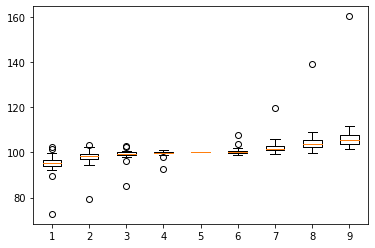

Obserwacje odstające : [102.36  89.46 101.49  72.79]
Obserwacje odstające : [103.42  79.31]
Obserwacje odstające : [102.72 102.54  96.2   85.22]
Obserwacje odstające : [98.   92.81]
Obserwacje odstające : [100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100]
Obserwacje odstające : [103.9  107.66]
Obserwacje odstające : [119.63]
Obserwacje odstające : [139.17]
Obserwacje odstające : [160.3]


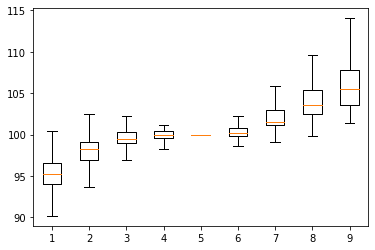

In [16]:
X5 = eliminuj_outliery(df,'Zharmonizowany indeks cen konsumpcyjnych (HICP) – średni roczny wskaźnik')

X6 - Poziom bezrobocia wśród ludzi 20-64 lata

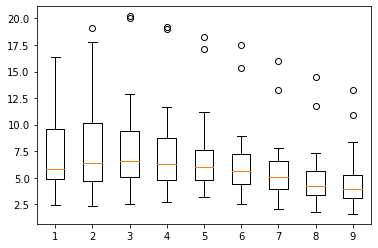

Nie ma obserwacji odstających dla roku 2011
Obserwacje odstające : [19.1]
Obserwacje odstające : [20.  20.2]
Obserwacje odstające : [19.2 19. ]
Obserwacje odstające : [18.2 17.1]
Obserwacje odstające : [17.5 15.3]
Obserwacje odstające : [16.  13.3]
Obserwacje odstające : [14.5 11.8]
Obserwacje odstające : [13.3 10.9]


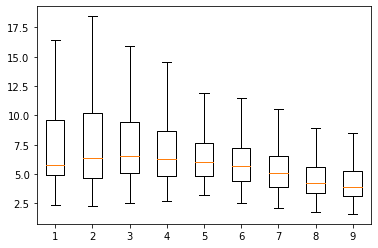

In [17]:
X6 = eliminuj_outliery(df,'Poziom bezrobocia wśród ludzi 20-64 lata')

X7 - Długość życia

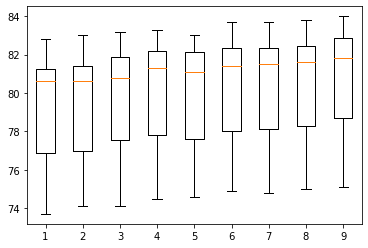

Nie ma obserwacji odstających dla roku 2011
Nie ma obserwacji odstających dla roku 2012
Nie ma obserwacji odstających dla roku 2013
Nie ma obserwacji odstających dla roku 2014
Nie ma obserwacji odstających dla roku 2015
Nie ma obserwacji odstających dla roku 2016
Nie ma obserwacji odstających dla roku 2017
Nie ma obserwacji odstających dla roku 2018
Nie ma obserwacji odstających dla roku 2019


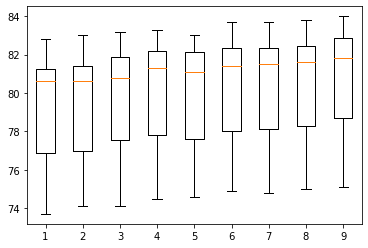

In [18]:
X7 = eliminuj_outliery(df,'Długość życia')

X8 - Procentowa ilość osób z wykształceniem wyższym w wieku 20-64 lata

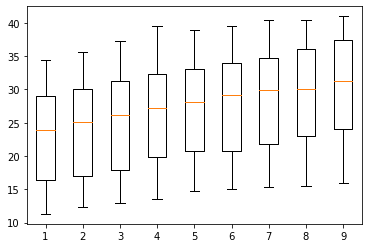

Nie ma obserwacji odstających dla roku 2011
Nie ma obserwacji odstających dla roku 2012
Nie ma obserwacji odstających dla roku 2013
Nie ma obserwacji odstających dla roku 2014
Nie ma obserwacji odstających dla roku 2015
Nie ma obserwacji odstających dla roku 2016
Nie ma obserwacji odstających dla roku 2017
Nie ma obserwacji odstających dla roku 2018
Nie ma obserwacji odstających dla roku 2019


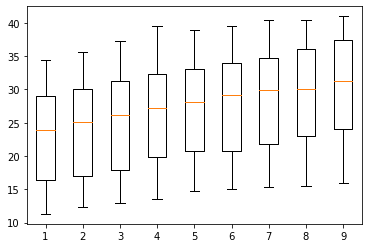

In [19]:
X8 = eliminuj_outliery(df,'Procentowa ilość osób z wykształceniem wyższym w wieku 20-64 lata')

df po zastąpieniu zmiennych odstających

In [20]:
d = {'X1' : X1, 'X2' : X2, 'X3' : X3, 'X4' : X4, 'X5' : X5, 'X6' : X6, 'X7' : X7, 'X8' : X8}
df = pd.concat(d.values(), axis=1, keys=d.keys())

# tabela do odrzucenia zmiennych quasi stałych

In [21]:
quasi_df = pd.DataFrame()
quasi_df['średnia'] = df.mean()
quasi_df['odchylenie standardowe'] = df.std()
quasi_df['współczynnik zmienności'] = quasi_df['odchylenie standardowe']/quasi_df['średnia']*100

In [22]:
quasi_df.index = quasi_df.index.get_level_values(0)

In [23]:
quasi_df.groupby(by=quasi_df.index).mean()

,średnia,odchylenie standardowe,współczynnik zmienności
X1,12191.479926,8221.020297,67.515897
X2,16.446667,4.200318,25.533088
X3,19.784014,6.026441,30.497376
X4,27756.707407,18319.345865,66.082103
X5,100.575731,1.598700,1.584009
X6,6.206852,2.716500,43.211525
X7,79.944815,2.845389,3.559575
X8,26.952963,7.151412,26.685615


In [24]:
# dla zarobków netto
quasi_df[:9].mean()

średnia                    12191.479926
odchylenie standardowe      8221.020297
współczynnik zmienności       67.515897
dtype: float64

In [25]:
quasi_df[27:36]

,średnia,odchylenie standardowe,współczynnik zmienności
X4,26397.866667,18015.321104,68.245367
X4,26326.700000,18001.893113,68.378844
X4,26384.200000,17855.014660,67.673133
X4,26770.200000,17867.193627,66.742847
X4,27559.233333,18206.564609,66.063393
X4,28072.533333,18451.674201,65.728568
X4,28846.266667,18642.435432,64.626857
X4,29513.333333,18926.357708,64.128160
X4,29940.033333,18907.658329,63.151761


In [26]:
quasi_df[27:36].mean()

średnia                    27756.707407
odchylenie standardowe     18319.345865
współczynnik zmienności       66.082103
dtype: float64

dwie zmienne (Zharmonizowany indeks cen konsumpcyjnych (HICP) – średni roczny wskaźnik i Długość życia) mają współczynnik zmienności poniżej 10% więc je odrzucamy z modelu, ponieważ są to zmienne quasi stałe

In [27]:
df.drop(['X5', 'X7'], inplace=True, axis=1)

In [28]:
df

X1                                                    \
                2011      2012      2013      2014      2015      2016   
Belgia      16155.90  16628.54  17057.94  17200.17  17433.61  18256.11   
Bułgaria     1698.22   1799.23   1899.03   2016.86   2169.57   2344.52   
Czechy       5098.07   5131.47   4958.95   4788.23   4959.67   5184.11   
Dania       17778.94  18017.05  18200.41  18453.01  18632.53  18812.99   
Niemcy      14923.50  15281.22  15528.82  15896.52  16254.16  16576.26   
Estonia      4343.57   4587.77   4904.29   5138.91   5504.01   6211.59   
Irlandia    18638.95  18913.88  18832.07  18944.27  19243.25  19768.23   
Grecja       9530.22   9265.39   8809.71   8955.03   8658.72   8434.73   
Hiszpania   11379.49  11446.04  11478.96  11519.75  11927.12  11919.80   
Francja     14237.83  14418.13  14841.75  14998.16  14798.86  15481.07   
Chorwacja    4265.61   4302.98   4346.31   4334.51   4518.91   4656.84   
Włochy      11193.90  11366.63  11531.76  12475.05  12859.23  12881.04   
Łotwa        2739.27   2827.38   2980.64   3240.17   3510.79   3765.26   
Litwa        2864.87   2982.08   3141.66   3358.58   3543.18   3895.72   
Luksemburg  21107.97  21777.19  22244.21  22682.48  22867.92  23071.22   
Węgry        3464.05   3215.68   3237.54   3239.21   3351.78   3569.36   
Malta        8664.38   8944.13   9168.00   8962.50   9128.63   9558.00   
Holandia    18116.27  18390.76  18830.55  19602.39  20060.26  21126.06   
Austria     15644.71  15930.77  16135.38  16523.60  16832.55  17605.87   
Polska       3639.50   3712.90   3827.97   4090.74   4233.16   4191.47   
Portugalia   7212.56   7582.80   7846.98   7704.26   7729.25   7821.93   
Rumunia      2126.55   2083.82   2256.24   2390.22   2641.58   2877.90   
Słowenia     6676.89   6757.80   6825.42   6915.40   6962.51   7043.00   
Słowacja     4159.51   4244.89   4323.21   4486.48   4662.07   4765.36   
Finlandia   16405.17  17022.24  17220.64  17275.45  17464.81  17803.59   
Szwecja     16687.58  17836.31  18368.84  18036.38  17756.62  17927.48   
Islandia    14267.79  15475.24  16509.42  18605.36  20813.95  24428.87   
Norwegia    24493.05  26292.05  26189.65  25156.80  24251.43  23948.86   
Szwajcaria  30306.19  32470.07  32128.49  31366.61  35549.52  35833.52   
Turcja       3324.21   3744.58   3828.92   3700.39   4021.79   4437.46   

                                            X2                                \
                2017      2018      2019  2011  2012  2013  2014  2015  2016   
Belgia      18658.25  19425.90  20123.43  15.3  15.3  15.1  15.5  14.9  15.5   
Bułgaria     2566.37   2723.55   3046.51  22.2  21.2  21.0  21.8  22.0  22.9   
Czechy       5620.21   6112.43   6480.17   9.8   9.6   8.6   9.7   9.7   9.7   
Dania       19108.75  19704.34  20139.77  12.1  12.0  11.9  12.1  12.2  11.9   
Niemcy      16849.06  17385.35  17972.35  15.8  16.1  16.1  16.7  16.7  16.5   
Estonia      6332.72   7392.97   7819.06  17.5  17.5  18.6  21.8  21.6  21.7   
Irlandia    20163.46  20837.37  21461.25  15.2  16.3  15.7  16.8  16.2  16.8   
Grecja       8363.46   8368.08   8516.82  21.4  23.1  23.1  22.1  21.4  21.2   
Hiszpania   11947.71  12376.67  12779.70  20.6  20.8  20.4  22.2  22.1  22.3   
Francja     15662.91  16028.10  17196.22  14.0  14.1  13.7  13.3  13.6  13.6   
Chorwacja    4981.71   5281.28   5465.73  20.9  20.4  19.5  19.4  20.0  19.5   
Włochy      12905.38  12989.48  13118.15  19.8  19.5  19.3  19.4  19.9  20.6   
Łotwa        4088.36   4665.98   5032.02  19.0  19.2  19.4  21.2  22.5  21.8   
Litwa        4398.84   4867.33   5357.36  19.2  18.6  20.6  19.1  22.2  21.9   
Luksemburg  24487.18  25016.42  26200.70  13.6  15.1  15.9  16.4  15.3  15.8   
Węgry        4011.86   4293.47   4695.27  14.1  14.3  15.0  15.0  14.9  14.5   
Malta        9776.63  10114.13  10765.88  15.6  15.1  15.8  15.8  16.6  16.5   
Holandia    21461.92  21703.80  22615.39  11.0  10.1  10.4  11.6  11.6  12.7   
Austria     18080.85  18428.12  19042.15  14.5  1

In [29]:
df.groupby(level=0,axis=1).mean()

,X1,X2,X3,X4,X6,X8
Belgia,17882.205556,15.411111,23.833333,34438.888889,5.366667,33.255556
Bułgaria,2251.540000,22.122222,21.830000,5806.666667,7.200000,23.233333
Czechy,5370.367778,9.544444,16.187778,16446.666667,3.655556,19.455556
Dania,18760.865556,12.200000,30.952917,46168.888889,4.822222,30.455556
Niemcy,16296.360000,16.544444,30.952917,34394.444444,3.388889,24.644444
Estonia,5803.876667,20.366667,13.562361,13494.444444,6.011111,33.644444
Irlandia,19644.747778,15.622222,11.753333,46957.777778,7.566667,38.388889
Grecja,8766.906667,20.988889,16.943333,17180.000000,12.511111,25.355556
Hiszpania,11863.915556,21.355556,10.042222,23361.111111,12.961111,32.111111
Francja,15295.892222,13.611111,18.662222,31852.222222,7.155556,30.277778


In [30]:
df.groupby(level=0,axis=1).mean().corr(method='pearson')

,X1,X2,X3,X4,X6,X8
X1,1.000000,-0.523894,-0.167675,0.938322,-0.382666,0.667834
X2,-0.523894,1.000000,-0.063662,-0.508570,0.539611,-0.336543
X3,-0.167675,-0.063662,1.000000,-0.119575,-0.349352,-0.224004
X4,0.938322,-0.508570,-0.119575,1.000000,-0.412413,0.674827
X6,-0.382666,0.539611,-0.349352,-0.412413,1.000000,-0.075770
X8,0.667834,-0.336543,-0.224004,0.674827,-0.075770,1.000000


<AxesSubplot:>

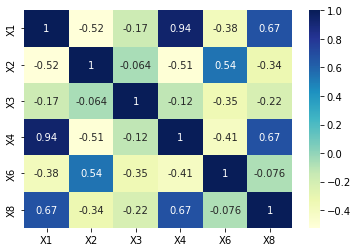

In [31]:
sns.heatmap(df.groupby(level=0,axis=1).mean().corr(method='pearson'), cmap="YlGnBu", annot=True)

odrzucam zmienną X4 Realny PKB na mieszkańca, z racji, ze jest silnie skorelowana ze zmienną Zarobki netto (singiel bez dzieci zarabiający 50% średnich zarobków) i ma niższy współczynnik zmienności

In [32]:
df.drop(['X4'], inplace=True, axis=1)

In [33]:
df

X1                                                    \
                2011      2012      2013      2014      2015      2016   
Belgia      16155.90  16628.54  17057.94  17200.17  17433.61  18256.11   
Bułgaria     1698.22   1799.23   1899.03   2016.86   2169.57   2344.52   
Czechy       5098.07   5131.47   4958.95   4788.23   4959.67   5184.11   
Dania       17778.94  18017.05  18200.41  18453.01  18632.53  18812.99   
Niemcy      14923.50  15281.22  15528.82  15896.52  16254.16  16576.26   
Estonia      4343.57   4587.77   4904.29   5138.91   5504.01   6211.59   
Irlandia    18638.95  18913.88  18832.07  18944.27  19243.25  19768.23   
Grecja       9530.22   9265.39   8809.71   8955.03   8658.72   8434.73   
Hiszpania   11379.49  11446.04  11478.96  11519.75  11927.12  11919.80   
Francja     14237.83  14418.13  14841.75  14998.16  14798.86  15481.07   
Chorwacja    4265.61   4302.98   4346.31   4334.51   4518.91   4656.84   
Włochy      11193.90  11366.63  11531.76  12475.05  12859.23  12881.04   
Łotwa        2739.27   2827.38   2980.64   3240.17   3510.79   3765.26   
Litwa        2864.87   2982.08   3141.66   3358.58   3543.18   3895.72   
Luksemburg  21107.97  21777.19  22244.21  22682.48  22867.92  23071.22   
Węgry        3464.05   3215.68   3237.54   3239.21   3351.78   3569.36   
Malta        8664.38   8944.13   9168.00   8962.50   9128.63   9558.00   
Holandia    18116.27  18390.76  18830.55  19602.39  20060.26  21126.06   
Austria     15644.71  15930.77  16135.38  16523.60  16832.55  17605.87   
Polska       3639.50   3712.90   3827.97   4090.74   4233.16   4191.47   
Portugalia   7212.56   7582.80   7846.98   7704.26   7729.25   7821.93   
Rumunia      2126.55   2083.82   2256.24   2390.22   2641.58   2877.90   
Słowenia     6676.89   6757.80   6825.42   6915.40   6962.51   7043.00   
Słowacja     4159.51   4244.89   4323.21   4486.48   4662.07   4765.36   
Finlandia   16405.17  17022.24  17220.64  17275.45  17464.81  17803.59   
Szwecja     16687.58  17836.31  18368.84  18036.38  17756.62  17927.48   
Islandia    14267.79  15475.24  16509.42  18605.36  20813.95  24428.87   
Norwegia    24493.05  26292.05  26189.65  25156.80  24251.43  23948.86   
Szwajcaria  30306.19  32470.07  32128.49  31366.61  35549.52  35833.52   
Turcja       3324.21   3744.58   3828.92   3700.39   4021.79   4437.46   

                                            X2                                \
                2017      2018      2019  2011  2012  2013  2014  2015  2016   
Belgia      18658.25  19425.90  20123.43  15.3  15.3  15.1  15.5  14.9  15.5   
Bułgaria     2566.37   2723.55   3046.51  22.2  21.2  21.0  21.8  22.0  22.9   
Czechy       5620.21   6112.43   6480.17   9.8   9.6   8.6   9.7   9.7   9.7   
Dania       19108.75  19704.34  20139.77  12.1  12.0  11.9  12.1  12.2  11.9   
Niemcy      16849.06  17385.35  17972.35  15.8  16.1  16.1  16.7  16.7  16.5   
Estonia      6332.72   7392.97   7819.06  17.5  17.5  18.6  21.8  21.6  21.7   
Irlandia    20163.46  20837.37  21461.25  15.2  16.3  15.7  16.8  16.2  16.8   
Grecja       8363.46   8368.08   8516.82  21.4  23.1  23.1  22.1  21.4  21.2   
Hiszpania   11947.71  12376.67  12779.70  20.6  20.8  20.4  22.2  22.1  22.3   
Francja     15662.91  16028.10  17196.22  14.0  14.1  13.7  13.3  13.6  13.6   
Chorwacja    4981.71   5281.28   5465.73  20.9  20.4  19.5  19.4  20.0  19.5   
Włochy      12905.38  12989.48  13118.15  19.8  19.5  19.3  19.4  19.9  20.6   
Łotwa        4088.36   4665.98   5032.02  19.0  19.2  19.4  21.2  22.5  21.8   
Litwa        4398.84   4867.33   5357.36  19.2  18.6  20.6  19.1  22.2  21.9   
Luksemburg  24487.18  25016.42  26200.70  13.6  15.1  15.9  16.4  15.3  15.8   
Węgry        4011.86   4293.47   4695.27  14.1  14.3  15.0  15.0  14.9  14.5   
Malta        9776.63  10114.13  10765.88  15.6  15.1  15.8  15.8  16.6  16.5   
Holandia    21461.92  21703.80  22615.39  11.0  10.1  10.4  11.6  11.6  12.7   
Austria     18080.85  18428.12  19042.15  14.5  1

<AxesSubplot:>

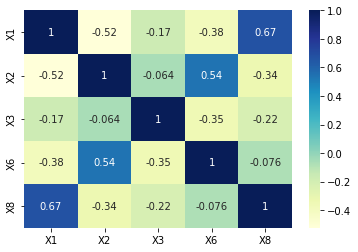

In [34]:
sns.heatmap(df.groupby(level=0,axis=1).mean().corr(method='pearson'), cmap="YlGnBu", annot=True)

z racji dużej koralacji pomiędzy zmiennymi X1, X8 odrzucam zmienną X8 - ilość osób z wykształceniem wyższym, z racji, ze jest silnie skorelowana ze zmienną Zarobki netto (singiel bez dzieci zarabiający 50% średnich zarobków) i ma niższy współczynnik zmienności

In [35]:
df.drop(['X8'], inplace=True, axis=1)

In [36]:
korelacja_df = df.groupby(level=0,axis=1).mean().corr(method='pearson')

In [37]:
korelacja_df

,X1,X2,X3,X6
X1,1.000000,-0.523894,-0.167675,-0.382666
X2,-0.523894,1.000000,-0.063662,0.539611
X3,-0.167675,-0.063662,1.000000,-0.349352
X6,-0.382666,0.539611,-0.349352,1.000000


<AxesSubplot:>

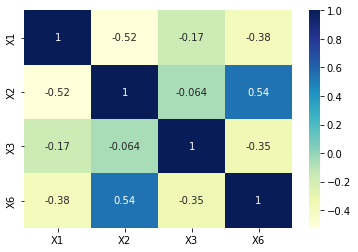

In [38]:
sns.heatmap(df.groupby(level=0,axis=1).mean().corr(method='pearson'), cmap="YlGnBu", annot=True)

# ustalenie wag zmiennych

In [39]:
korelacja_df_abs = korelacja_df.abs()

In [40]:
korelacja_df_abs

,X1,X2,X3,X6
X1,1.000000,0.523894,0.167675,0.382666
X2,0.523894,1.000000,0.063662,0.539611
X3,0.167675,0.063662,1.000000,0.349352
X6,0.382666,0.539611,0.349352,1.000000


In [41]:
sumy_wagi = 1/korelacja_df_abs.sum(axis=1)

In [42]:
wagi = sumy_wagi/sumy_wagi.sum()

In [43]:
wagi

X1    0.238069
X2    0.232145
X3    0.312403
X6    0.217382
dtype: float64

# podział na stymulanty i destymulanty

df po odrzuceniu zmiennych

In [44]:
df

X1                                                    \
                2011      2012      2013      2014      2015      2016   
Belgia      16155.90  16628.54  17057.94  17200.17  17433.61  18256.11   
Bułgaria     1698.22   1799.23   1899.03   2016.86   2169.57   2344.52   
Czechy       5098.07   5131.47   4958.95   4788.23   4959.67   5184.11   
Dania       17778.94  18017.05  18200.41  18453.01  18632.53  18812.99   
Niemcy      14923.50  15281.22  15528.82  15896.52  16254.16  16576.26   
Estonia      4343.57   4587.77   4904.29   5138.91   5504.01   6211.59   
Irlandia    18638.95  18913.88  18832.07  18944.27  19243.25  19768.23   
Grecja       9530.22   9265.39   8809.71   8955.03   8658.72   8434.73   
Hiszpania   11379.49  11446.04  11478.96  11519.75  11927.12  11919.80   
Francja     14237.83  14418.13  14841.75  14998.16  14798.86  15481.07   
Chorwacja    4265.61   4302.98   4346.31   4334.51   4518.91   4656.84   
Włochy      11193.90  11366.63  11531.76  12475.05  12859.23  12881.04   
Łotwa        2739.27   2827.38   2980.64   3240.17   3510.79   3765.26   
Litwa        2864.87   2982.08   3141.66   3358.58   3543.18   3895.72   
Luksemburg  21107.97  21777.19  22244.21  22682.48  22867.92  23071.22   
Węgry        3464.05   3215.68   3237.54   3239.21   3351.78   3569.36   
Malta        8664.38   8944.13   9168.00   8962.50   9128.63   9558.00   
Holandia    18116.27  18390.76  18830.55  19602.39  20060.26  21126.06   
Austria     15644.71  15930.77  16135.38  16523.60  16832.55  17605.87   
Polska       3639.50   3712.90   3827.97   4090.74   4233.16   4191.47   
Portugalia   7212.56   7582.80   7846.98   7704.26   7729.25   7821.93   
Rumunia      2126.55   2083.82   2256.24   2390.22   2641.58   2877.90   
Słowenia     6676.89   6757.80   6825.42   6915.40   6962.51   7043.00   
Słowacja     4159.51   4244.89   4323.21   4486.48   4662.07   4765.36   
Finlandia   16405.17  17022.24  17220.64  17275.45  17464.81  17803.59   
Szwecja     16687.58  17836.31  18368.84  18036.38  17756.62  17927.48   
Islandia    14267.79  15475.24  16509.42  18605.36  20813.95  24428.87   
Norwegia    24493.05  26292.05  26189.65  25156.80  24251.43  23948.86   
Szwajcaria  30306.19  32470.07  32128.49  31366.61  35549.52  35833.52   
Turcja       3324.21   3744.58   3828.92   3700.39   4021.79   4437.46   

                                            X2                                \
                2017      2018      2019  2011  2012  2013  2014  2015  2016   
Belgia      18658.25  19425.90  20123.43  15.3  15.3  15.1  15.5  14.9  15.5   
Bułgaria     2566.37   2723.55   3046.51  22.2  21.2  21.0  21.8  22.0  22.9   
Czechy       5620.21   6112.43   6480.17   9.8   9.6   8.6   9.7   9.7   9.7   
Dania       19108.75  19704.34  20139.77  12.1  12.0  11.9  12.1  12.2  11.9   
Niemcy      16849.06  17385.35  17972.35  15.8  16.1  16.1  16.7  16.7  16.5   
Estonia      6332.72   7392.97   7819.06  17.5  17.5  18.6  21.8  21.6  21.7   
Irlandia    20163.46  20837.37  21461.25  15.2  16.3  15.7  16.8  16.2  16.8   
Grecja       8363.46   8368.08   8516.82  21.4  23.1  23.1  22.1  21.4  21.2   
Hiszpania   11947.71  12376.67  12779.70  20.6  20.8  20.4  22.2  22.1  22.3   
Francja     15662.91  16028.10  17196.22  14.0  14.1  13.7  13.3  13.6  13.6   
Chorwacja    4981.71   5281.28   5465.73  20.9  20.4  19.5  19.4  20.0  19.5   
Włochy      12905.38  12989.48  13118.15  19.8  19.5  19.3  19.4  19.9  20.6   
Łotwa        4088.36   4665.98   5032.02  19.0  19.2  19.4  21.2  22.5  21.8   
Litwa        4398.84   4867.33   5357.36  19.2  18.6  20.6  19.1  22.2  21.9   
Luksemburg  24487.18  25016.42  26200.70  13.6  15.1  15.9  16.4  15.3  15.8   
Węgry        4011.86   4293.47   4695.27  14.1  14.3  15.0  15.0  14.9  14.5   
Malta        9776.63  10114.13  10765.88  15.6  15.1  15.8  15.8  16.6  16.5   
Holandia    21461.92  21703.80  22615.39  11.0  10.1  10.4  11.6  11.6  12.7   
Austria     18080.85  18428.12  19042.15  14.5  1

# TOPSIS

In [45]:
#stosuję przekształcenie ilorazowe

In [46]:
def normalizuj_df_TOPSIS(df, nCol,waga):
    for i in range(0, nCol):
        mianownik = 0
        for j in range(len(df)):
            mianownik = mianownik + (df.iloc[j, i])**2
        mianownik = mianownik**0.5
        for j in range(len(df)):
            df.iloc[j, i] = (df.iloc[j, i] / mianownik)*waga[i]
    return df

In [47]:
#??

In [48]:
def wzorzec_antywzorzec_TOPSIS(df, nCol, charakter):
    wzorzec = (df.max().values)
    antywzorzec = (df.min().values)
    for i in range(0, nCol):
        if charakter[i] == '-':
            wzorzec[i], antywzorzec[i] = antywzorzec[i], wzorzec[i]
    return wzorzec, antywzorzec

In [49]:
def topsis_ranking(df, nCol, charakter, waga):
    # normalizowanie ramki danych
    znormalizowane_df = normalizuj_df_TOPSIS(df, nCol,waga)
    # obliczanie wzorca i antywzorca
    wzorzec, antywzorzec = wzorzec_antywzorzec_TOPSIS(znormalizowane_df, nCol, charakter)
    # uśrednianie do wag zmiennych
    for i in range(0,nCol):
        column = znormalizowane_df.columns[i]
        znormalizowane_df[column] = znormalizowane_df[column]
    # obliczanie TOPSIS score
    score = []
    for i in range(len(znormalizowane_df)):
        #obliczam odleglosci
        odleglosc_wzorzec, odleglosc_antywzorzec = 0, 0
        for j in range(0, nCol):
            odleglosc_wzorzec = odleglosc_wzorzec + (znormalizowane_df.iloc[i, j] - wzorzec[j])**2
            odleglosc_antywzorzec = odleglosc_antywzorzec + (znormalizowane_df.iloc[i, j] - antywzorzec[j])**2
        odleglosc_wzorzec, odleglosc_antywzorzec = odleglosc_wzorzec**0.5, odleglosc_antywzorzec**0.5
        score.append(odleglosc_antywzorzec/(odleglosc_wzorzec + odleglosc_antywzorzec))
    df['Topsis Score'] = score
    # obliczanie rankingu na podstawie TOPSIS score
    df['Ranking'] = (df['Topsis Score'].rank(
        method='max', ascending=False))
    # df['Ranking'] = df.astype({"Ranking": int})
    df = df.astype({(     'Ranking',     ''): 'int'})
    return df

In [50]:
topsis_ranking(df.xs('2011', axis=1, level=1, drop_level=False), 4, ['+','-','-','-'], wagi)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/var/folders/q3/dc0434yn3fb8r4556r2z8n0m0000gn/T/ipykernel_30123/4071939607.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,X1,X2,X3,X6,Topsis Score,Ranking
,2011,2011,2011,2011,,
Belgia,0.052857,0.039135,0.075191,0.025128,0.532155,12
Bułgaria,0.005556,0.056784,0.058851,0.042717,0.307460,28
Czechy,0.016679,0.025067,0.041095,0.025128,0.490862,15
Dania,0.058167,0.030950,0.085648,0.028143,0.529035,13
Niemcy,0.048825,0.040414,0.084614,0.021610,0.499109,14
Estonia,0.014211,0.044762,0.044145,0.049250,0.367535,22
Irlandia,0.060980,0.038879,0.029003,0.056788,0.585819,9
Grecja,0.031180,0.054738,0.055420,0.065332,0.312779,26
Hiszpania,0.037230,0.052692,0.029412,0.082418,0.398269,19


In [51]:
wagi

X1    0.238069
X2    0.232145
X3    0.312403
X6    0.217382
dtype: float64

# Hellwig

In [52]:
from sklearn import preprocessing
def normalizuj_df_Hellwig(df, nCol, waga):
    nazwy = df.columns
    scaler = preprocessing.StandardScaler()
    znormalizowane_df = scaler.fit_transform(df)
    znormalizowane_df = pd.DataFrame(znormalizowane_df, columns = nazwy)
    for i in range(0,nCol):
        column = znormalizowane_df.columns[i]
        znormalizowane_df[column] = znormalizowane_df[column]*waga[i]
    return znormalizowane_df

In [53]:
def wzorzec_Hellwig(df,nCol,charakter):
    wzorzec = []
    for i in range(0,nCol):
        column = df.columns[i]
        if charakter[i] == '-':
            wzorzec.append(min(df[column]))
        else:
            wzorzec.append(max(df[column]))
    return wzorzec

In [54]:
def Hellwig_ranking(df, nCol, charakter, waga):
    # normalizuje ramkę danych
    znormalizowane_df = normalizuj_df_Hellwig(df,nCol,waga)

    # obliczam wzorzec
    wzorzec = wzorzec_Hellwig(znormalizowane_df, nCol,charakter)
    # obliczam Hellwig score
    d = []
    for i in range(len(znormalizowane_df)):
        #obliczam odleglosci od wzorca
        odleglosc = 0
        for j in range(0, nCol):
            odleglosc = odleglosc + ((znormalizowane_df.iloc[i, j] - wzorzec[j])**2)
        odleglosc = (odleglosc/len(wzorzec))**0.5
        d.append(odleglosc)
    d0 = np.mean(d) + 2*np.std(d)
    score = []
    for i in range(len(znormalizowane_df)):
        score.append(1-(d[i]/d0))
    df['Hellwig Score'] = score

    # obliczam rankingi
    df['Ranking'] = (df['Hellwig Score'].rank(
        method='max', ascending=False))
    df = df.astype({(     'Ranking',     ''): 'int'})
    return df

In [55]:
Hellwig_ranking(df.xs('2011', axis=1, level=1, drop_level=False), 4, ['+','-','-','-'], wagi)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/var/folders/q3/dc0434yn3fb8r4556r2z8n0m0000gn/T/ipykernel_30123/2949825673.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hellwig Score'] = score
/var/folders/q3/dc0434yn3fb8r4556r2z8n0m0000gn/T/ipyk

,X1,X2,X3,X6,Hellwig Score,Ranking
,2011,2011,2011,2011,,
Belgia,16155.90,15.3,27.61,5.0,0.321354,17
Bułgaria,1698.22,22.2,21.61,8.5,0.147239,28
Czechy,5098.07,9.8,15.09,5.0,0.476480,12
Dania,17778.94,12.1,31.45,5.6,0.241839,20
Niemcy,14923.50,15.8,31.07,4.3,0.209965,23
Estonia,4343.57,17.5,16.21,9.8,0.318191,18
Irlandia,18638.95,15.2,10.65,11.3,0.532178,7
Grecja,9530.22,21.4,20.35,13.0,0.201647,24
Hiszpania,11379.49,20.6,10.80,16.4,0.222764,21


# Metoda BZW

In [56]:
#ujednolicam charakter zmiennych i mnożę destymulany *-1

In [57]:
from sklearn import preprocessing
def normalizuj_df_BZW(df, nCol, charakter, waga):
    for i in range(0,nCol):
        column = df.columns[i]
        if charakter[i] == '-':
            df[column] = df[column]*(-1)*waga[i]
    nazwy = df.columns
    scaler = preprocessing.StandardScaler()
    znormalizowane_df = scaler.fit_transform(df)
    znormalizowane_df = pd.DataFrame(znormalizowane_df, columns = nazwy)
    return znormalizowane_df

In [58]:
def ranking_BZW(df, nCol, charakter, waga):
    # normalizuję ramkę danych
    znormalizowane_df = normalizuj_df_BZW(df, nCol, charakter, waga)
    # obliczam wartości bezwzględne z wartości minimalnych
    minimum = [] 
    for i in range(0,nCol):
        column = znormalizowane_df.columns[i]
        minimum.append(math.fabs(min(znormalizowane_df[column])))
    # obliczam syntetyczną zmiennej pomocniczą
    pomocnicza = pd.DataFrame(columns=df.columns)
    for i in range(len(znormalizowane_df)):
        lista_pomocnicza = []
        for j in range(0, nCol):
            lista_pomocnicza.append(znormalizowane_df.iloc[i, j] + minimum[j])
        pomocnicza.loc[len(pomocnicza)] = lista_pomocnicza
    # obliczam max z syntetycznej miary pomocniczej
    maksimum_pomocnicza = [] 
    for i in range(0,nCol):
        column = pomocnicza.columns[i]
        maksimum_pomocnicza.append(math.fabs(max(pomocnicza[column])))
    #obliczam bzw score
    licznik = pomocnicza.sum(axis=1)
    mianownik = sum(maksimum_pomocnicza)
    score = []
    for i in range(len(licznik)):
            score.append(licznik[i]/mianownik)
    df['BZW Score'] = score
    # obliczam ranking
    df['Ranking'] = (df['BZW Score'].rank(
        method='max', ascending=False))
    df = df.astype({(     'Ranking',     ''): 'int'})
    df.index = df.index
    return df

In [59]:
ranking_BZW(df.xs('2011', axis=1, level=1, drop_level=False), 4, ['+','-','-','-'],wagi)

/var/folders/q3/dc0434yn3fb8r4556r2z8n0m0000gn/T/ipykernel_30123/4238653168.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column]*(-1)*waga[i]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/var/folders/q3/dc0434yn3fb8r4556r2z8n0m0000g

,X1,X2,X3,X6,BZW Score,Ranking
,2011,2011,2011,2011,,
Belgia,16155.90,-3.551823,-8.625446,-1.086911,0.527600,14
Bułgaria,1698.22,-5.153626,-6.751028,-1.847749,0.286666,29
Czechy,5098.07,-2.275024,-4.714161,-1.086911,0.667688,6
Dania,17778.94,-2.808958,-9.825074,-1.217341,0.539983,13
Niemcy,14923.50,-3.667896,-9.706361,-0.934744,0.481844,18
Estonia,4343.57,-4.062543,-5.064052,-2.130346,0.426493,20
Irlandia,18638.95,-3.528609,-3.327092,-2.456420,0.626122,10
Grecja,9530.22,-4.967910,-6.357401,-2.825969,0.297260,28
Hiszpania,11379.49,-4.782194,-3.373952,-3.565069,0.372051,23


# VIKOR

In [60]:
def normalizuj_df_VIKOR(df, nCol, charakter):
    for i in range(0,nCol):
        column = df.columns[i]
        if charakter[i] == '+':
            df[column] = df[column]/max(df[column])
        if charakter[i] == '-':
            df[column] = min(df[column])/df[column]
    return df

In [61]:
def wzorzec_antywzorzec_VIKOR(df):
    wzorzec_max = (df.max(axis=0))
    wzorzec_min = (df.min(axis=0))
    return wzorzec_min, wzorzec_max

In [62]:
def ranking_VIKOR(df, nCol, charakter, waga):
    # normalizuję ramkę danych
    znormalizowane_df = normalizuj_df_VIKOR(df, nCol, charakter)
    # obliczam wzorzec_min, wzorzec_max
    wzorzec_min, wzorzec_max = wzorzec_antywzorzec_VIKOR(znormalizowane_df)
    # Obliczam metryki S,R
    s_df = pd.DataFrame()
    for i in range(0,nCol):
        column = znormalizowane_df.columns[i]
        pom = []
        for j in znormalizowane_df[column].values:
            pom.append((waga[i]*(wzorzec_max[i]-j))/(wzorzec_max[i]-wzorzec_min[i]))
        s_df[f"{znormalizowane_df.columns[i][0]}"] = pom
    s_df['Si'] = s_df.sum(axis=1)
    s_df['Ri'] = s_df[s_df.columns[0:5]].max(axis=1)
    s_plus = s_df.Si.min()
    s_minus = s_df.Si.max()
    r_plus = s_df.Ri.min()
    r_minus = s_df.Ri.max()
    #Obliczam ostatnią metrykę T
    s_df['Ti'] = ((0.5*(s_df.Si-s_plus)/(s_minus-s_plus))+(0.5*(s_df.Ri-r_plus)/(r_minus-r_plus)))
    # obliczam rankingi
    s_df['Ranking_S'] = (s_df['Si'].rank(method='max', ascending=True))
    s_df = s_df.astype({"Ranking_S": int})
    s_df['Ranking_R'] = (s_df['Ri'].rank(method='max', ascending=True))
    s_df = s_df.astype({"Ranking_R": int})
    s_df['Ranking_T'] = (s_df['Ti'].rank(method='max', ascending=True))
    s_df = s_df.astype({"Ranking_T": int})
    s_df.index = df.index
    return s_df
    
        

In [63]:
ranking_VIKOR(df.xs('2011', axis=1, level=1, drop_level=False), 4, ['+','-','-','-'], wagi)

/var/folders/q3/dc0434yn3fb8r4556r2z8n0m0000gn/T/ipykernel_30123/3160144781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column]/max(df[column])
/var/folders/q3/dc0434yn3fb8r4556r2z8n0m0000gn/T/ipykernel_30123/3160144781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = min(df[column])/df[column]


,X1,X2,X3,X6,Si,Ri,Ti,Ranking_S,Ranking_R,Ranking_T
Belgia,0.117756,0.152100,0.290156,0.132417,0.692429,0.692429,0.622592,17,17,17
Bułgaria,0.238069,0.223399,0.239568,0.182747,0.883784,0.883784,0.930239,29,29,29
Czechy,0.209777,0.023357,0.138984,0.132417,0.504535,0.504535,0.320508,7,7,7
Dania,0.104249,0.091433,0.312403,0.145513,0.653598,0.653598,0.560162,15,15,15
Niemcy,0.128011,0.159360,0.310447,0.112519,0.710337,0.710337,0.651382,18,18,18
Estonia,0.216055,0.180939,0.162018,0.192285,0.751298,0.751298,0.717237,20,20,20
Irlandia,0.097092,0.150591,0.000000,0.200563,0.448247,0.448247,0.230012,3,3,3
Grecja,0.172893,0.217489,0.225154,0.207636,0.823172,0.823172,0.832792,26,26,26
Hiszpania,0.157504,0.211120,0.006561,0.217382,0.592567,0.592567,0.462040,12,12,12
Francja,0.133717,0.130799,0.217773,0.162049,0.644338,0.644338,0.545274,14,14,14


In [64]:
#wybór najlepszego rankingu

In [65]:
#Porównanie rankingów

In [66]:
df.columns.get_level_values(1).unique().values

array(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'], dtype=object)

In [67]:
def metoda_porownywania_rankingow_kukula(df):
    rankingi = pd.DataFrame(index = df.index)
    # wektor_metody = pd.DataFrame(columns=['TOPSiS','Hellwig','BZW','Vikor'])
    wektor_metody = []
    for rok in df.columns.get_level_values(1).unique():
        rankingi['TOPSiS'] = topsis_ranking(df.xs(rok, axis=1, level=1, drop_level=False), 4, ['+','-','-','-'], wagi)[['Ranking']].values
        rankingi['Hellwig'] = Hellwig_ranking(df.xs(rok, axis=1, level=1, drop_level=False), 4, ['+','-','-','-'], wagi)[['Ranking']].values
        rankingi['BZW'] = ranking_BZW(df.xs(rok, axis=1, level=1, drop_level=False), 4, ['+','-','-','-'],wagi)[['Ranking']].values
        rankingi['Vikor'] = ranking_VIKOR(df.xs(rok, axis=1, level=1, drop_level=False), 4, ['+','-','-','-'], wagi)[['Ranking_T']].values
        #etap 1: obliczenie (1-suma(|Cip-Ciq|)/n^2-z)
        M = np.zeros((4,4))
        for i in range(len(M)):
            for j in range(len(M[i])):
                column1 = rankingi.columns[i]
                column2 = rankingi.columns[j]
                M[i][j] = 1-((2*sum(abs(rankingi[[column1]].values-rankingi[[column2]].values)))/(30*30))
        sum_M = (1/3)*(np.sum(M,axis=0)-1)
        wektor_metody.append(sum_M)
        print(f'Wektor wartości miary podobieństwa dla roku {rok}')
        print(sum_M)
        print(f'Dla roku {rok} najlepszą metodą jest')
        print(rankingi.columns[np.argmax(sum_M)]+ '\n')
    print(M)
    compare = pd.DataFrame(wektor_metody, columns=['TOPSiS','Hellwig','BZW','Vikor'], index = df.columns.get_level_values(1).unique().values)
    compare.to_excel('metody_razem.xlsx')
    return compare


In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
metoda_porownywania_rankingow_kukula(df)

Wektor wartości miary podobieństwa dla roku 2011
[0.81185185 0.82518519 0.85333333 0.81925926]
Dla roku 2011 najlepszą metodą jest
BZW

Wektor wartości miary podobieństwa dla roku 2012
[0.82962963 0.82962963 0.8637037  0.79555556]
Dla roku 2012 najlepszą metodą jest
BZW

Wektor wartości miary podobieństwa dla roku 2013
[0.82962963 0.81777778 0.8562963  0.8       ]
Dla roku 2013 najlepszą metodą jest
BZW

Wektor wartości miary podobieństwa dla roku 2014
[0.84888889 0.8237037  0.8637037  0.81481481]
Dla roku 2014 najlepszą metodą jest
BZW

Wektor wartości miary podobieństwa dla roku 2015
[0.85037037 0.82962963 0.86518519 0.82074074]
Dla roku 2015 najlepszą metodą jest
BZW

Wektor wartości miary podobieństwa dla roku 2016
[0.83851852 0.8        0.84592593 0.78074074]
Dla roku 2016 najlepszą metodą jest
BZW

Wektor wartości miary podobieństwa dla roku 2017
[0.83407407 0.80592593 0.84444444 0.80740741]
Dla roku 2017 najlepszą metodą jest
BZW

Wektor wartości miary podobieństwa dla roku 2018

,TOPSiS,Hellwig,BZW,Vikor
2011,0.811852,0.825185,0.853333,0.819259
2012,0.829630,0.829630,0.863704,0.795556
2013,0.829630,0.817778,0.856296,0.800000
2014,0.848889,0.823704,0.863704,0.814815
2015,0.850370,0.829630,0.865185,0.820741
2016,0.838519,0.800000,0.845926,0.780741
2017,0.834074,0.805926,0.844444,0.807407
2018,0.835556,0.783704,0.844444,0.792593
2019,0.841481,0.826667,0.840000,0.801481


In [70]:
topsis=pd.DataFrame(index = df.index)
for rok in df.columns.get_level_values(1).unique():
    topsis[f'{rok}'] = topsis_ranking(df.xs(rok, axis=1, level=1, drop_level=False), 4, ['+','-','-','-'], wagi)[['Ranking']].values


In [71]:
topsis.to_excel('topsis.xlsx')

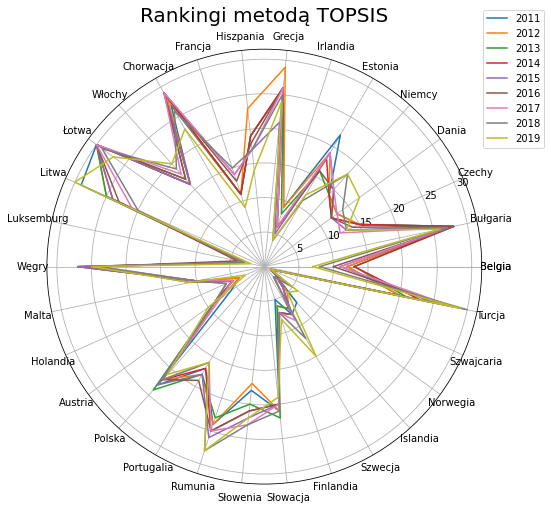

In [72]:
categories = topsis.index
categories = [*categories, categories[0]]
dwa11 = topsis['2011']
dwa12 = topsis['2012']
dwa13 = topsis['2013']
dwa14 = topsis['2014']
dwa15 = topsis['2015']
dwa16 = topsis['2016']
dwa17 = topsis['2017']
dwa18 = topsis['2018']
dwa19 = topsis['2019']
dwa11 = [*dwa11, dwa11[0]]
dwa12 = [*dwa12, dwa12[0]]
dwa13 = [*dwa13, dwa13[0]]
dwa14 = [*dwa14, dwa14[0]]
dwa15 = [*dwa15, dwa15[0]]
dwa16 = [*dwa16, dwa16[0]]
dwa17 = [*dwa17, dwa17[0]]
dwa18 = [*dwa18, dwa18[0]]
dwa19 = [*dwa19, dwa19[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(dwa11))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, dwa11, label='2011')
plt.plot(label_loc, dwa12, label='2012')
plt.plot(label_loc, dwa13, label='2013')
plt.plot(label_loc, dwa14, label='2014')
plt.plot(label_loc, dwa15, label='2015')
plt.plot(label_loc, dwa16, label='2016')
plt.plot(label_loc, dwa17, label='2017')
plt.plot(label_loc, dwa18, label='2018')
plt.plot(label_loc, dwa19, label='2019')

plt.title('Rankingi metodą TOPSIS', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
angle = np.deg2rad(67.5)
plt.legend(loc="lower left",
          bbox_to_anchor=(.8 + np.cos(angle)/2, .3 + np.sin(angle)/2))


In [73]:
hellwig=pd.DataFrame(index = df.index)
for rok in df.columns.get_level_values(1).unique():
    hellwig[f'{rok}'] = Hellwig_ranking(df.xs(rok, axis=1, level=1, drop_level=False), 4, ['+','-','-','-'], wagi)[['Ranking']].values


In [74]:
hellwig.to_excel('hellwig.xlsx')

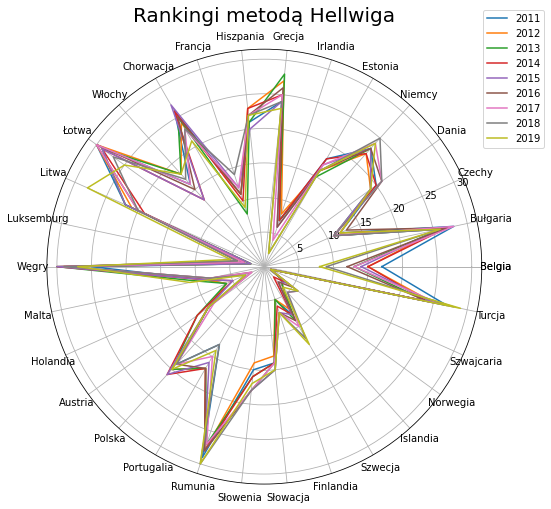

In [75]:
categories = hellwig.index
categories = [*categories, categories[0]]
dwa11 = hellwig['2011']
dwa12 = hellwig['2012']
dwa13 = hellwig['2013']
dwa14 = hellwig['2014']
dwa15 = hellwig['2015']
dwa16 = hellwig['2016']
dwa17 = hellwig['2017']
dwa18 = hellwig['2018']
dwa19 = hellwig['2019']
dwa11 = [*dwa11, dwa11[0]]
dwa12 = [*dwa12, dwa12[0]]
dwa13 = [*dwa13, dwa13[0]]
dwa14 = [*dwa14, dwa14[0]]
dwa15 = [*dwa15, dwa15[0]]
dwa16 = [*dwa16, dwa16[0]]
dwa17 = [*dwa17, dwa17[0]]
dwa18 = [*dwa18, dwa18[0]]
dwa19 = [*dwa19, dwa19[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(dwa11))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, dwa11, label='2011')
plt.plot(label_loc, dwa12, label='2012')
plt.plot(label_loc, dwa13, label='2013')
plt.plot(label_loc, dwa14, label='2014')
plt.plot(label_loc, dwa15, label='2015')
plt.plot(label_loc, dwa16, label='2016')
plt.plot(label_loc, dwa17, label='2017')
plt.plot(label_loc, dwa18, label='2018')
plt.plot(label_loc, dwa19, label='2019')

plt.title('Rankingi metodą Hellwiga', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
angle = np.deg2rad(67.5)
plt.legend(loc="lower left",
          bbox_to_anchor=(.8 + np.cos(angle)/2, .3 + np.sin(angle)/2))


In [76]:
BZW=pd.DataFrame(index = df.index)
for rok in df.columns.get_level_values(1).unique():
    BZW[f'{rok}'] = ranking_BZW(df.xs(rok, axis=1, level=1, drop_level=False), 4, ['+','-','-','-'], wagi)[['Ranking']].values


In [77]:
BZW.to_excel('BZW.xlsx')

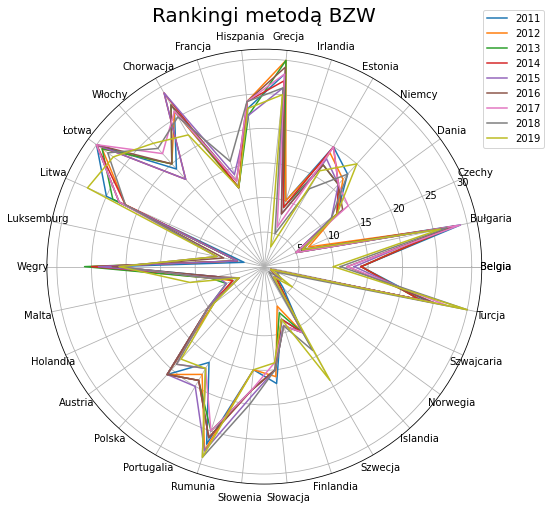

In [78]:
categories = BZW.index
categories = [*categories, categories[0]]
dwa11 = BZW['2011']
dwa12 = BZW['2012']
dwa13 = BZW['2013']
dwa14 = BZW['2014']
dwa15 = BZW['2015']
dwa16 = BZW['2016']
dwa17 = BZW['2017']
dwa18 = BZW['2018']
dwa19 = BZW['2019']
dwa11 = [*dwa11, dwa11[0]]
dwa12 = [*dwa12, dwa12[0]]
dwa13 = [*dwa13, dwa13[0]]
dwa14 = [*dwa14, dwa14[0]]
dwa15 = [*dwa15, dwa15[0]]
dwa16 = [*dwa16, dwa16[0]]
dwa17 = [*dwa17, dwa17[0]]
dwa18 = [*dwa18, dwa18[0]]
dwa19 = [*dwa19, dwa19[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(dwa11))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, dwa11, label='2011')
plt.plot(label_loc, dwa12, label='2012')
plt.plot(label_loc, dwa13, label='2013')
plt.plot(label_loc, dwa14, label='2014')
plt.plot(label_loc, dwa15, label='2015')
plt.plot(label_loc, dwa16, label='2016')
plt.plot(label_loc, dwa17, label='2017')
plt.plot(label_loc, dwa18, label='2018')
plt.plot(label_loc, dwa19, label='2019')

plt.title('Rankingi metodą BZW', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
angle = np.deg2rad(67.5)
plt.legend(loc="lower left",
          bbox_to_anchor=(.8 + np.cos(angle)/2, .3 + np.sin(angle)/2))


In [79]:
VIKOR=pd.DataFrame(index = df.index)
for rok in df.columns.get_level_values(1).unique():
    VIKOR[f'{rok}'] = ranking_VIKOR(df.xs(rok, axis=1, level=1, drop_level=False), 4, ['+','-','-','-'], wagi)[['Ranking_T']].values


In [80]:
VIKOR.to_excel('VIKOR.xlsx')

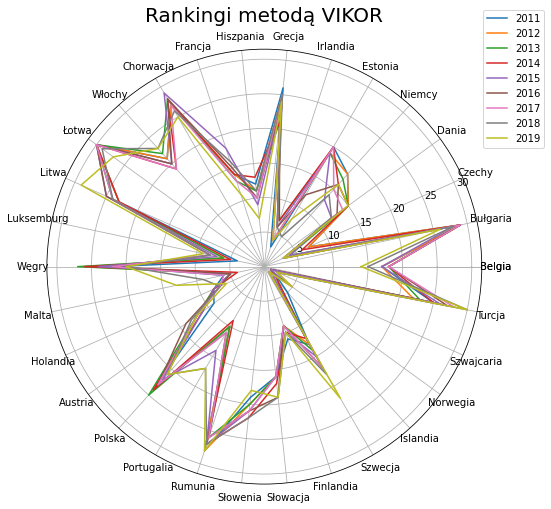

In [81]:
categories = VIKOR.index
categories = [*categories, categories[0]]
dwa11 = VIKOR['2011']
dwa12 = VIKOR['2012']
dwa13 = VIKOR['2013']
dwa14 = VIKOR['2014']
dwa15 = VIKOR['2015']
dwa16 = VIKOR['2016']
dwa17 = VIKOR['2017']
dwa18 = VIKOR['2018']
dwa19 = VIKOR['2019']
dwa11 = [*dwa11, dwa11[0]]
dwa12 = [*dwa12, dwa12[0]]
dwa13 = [*dwa13, dwa13[0]]
dwa14 = [*dwa14, dwa14[0]]
dwa15 = [*dwa15, dwa15[0]]
dwa16 = [*dwa16, dwa16[0]]
dwa17 = [*dwa17, dwa17[0]]
dwa18 = [*dwa18, dwa18[0]]
dwa19 = [*dwa19, dwa19[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(dwa11))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, dwa11, label='2011')
plt.plot(label_loc, dwa12, label='2012')
plt.plot(label_loc, dwa13, label='2013')
plt.plot(label_loc, dwa14, label='2014')
plt.plot(label_loc, dwa15, label='2015')
plt.plot(label_loc, dwa16, label='2016')
plt.plot(label_loc, dwa17, label='2017')
plt.plot(label_loc, dwa18, label='2018')
plt.plot(label_loc, dwa19, label='2019')

plt.title('Rankingi metodą VIKOR', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
angle = np.deg2rad(67.5)
plt.legend(loc="lower left",
          bbox_to_anchor=(.8 + np.cos(angle)/2, .3 + np.sin(angle)/2))
